In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import json

json_file_path = "../clients/logs/motor_imagery/data_20240708_142625.json"

with open(json_file_path) as f:
    data = json.load(f)

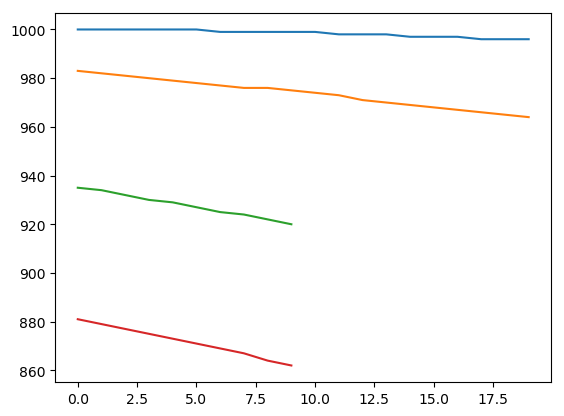

In [16]:
for trial in data["samples"]:
    plt.plot(np.array(trial)[:, 0])

In [14]:
data["cues"]

['Right Hand', 'Right Hand', 'Foot', 'Foot']

## Creating Neural Decoder from Dataset

In [18]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import BNCI2014_001, Zhou2016
from moabb.evaluations import CrossSessionEvaluation
from moabb.paradigms import LeftRightImagery


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
moabb.set_log_level("info")

ModuleNotFoundError: No module named 'moabb'

### Load Dataset

In [ ]:
subj = [1, 2]
datasets = [Zhou2016(), BNCI2014_001()]
for d in datasets:
    d.subject_list = subj

### Create Pipeline

In [ ]:
pipeline = {}
pipeline["CSP+LDA"] = make_pipeline(CSP(n_components=8), LDA())

### Choose Paradigm

In [ ]:
# X_all, labels_all, meta_all = [], [], []
# for d in datasets:
#     # sessions = d.get_data(subjects=[2])
#     X, labels, meta = paradigm.get_data(dataset=d, subjects=[2])
#     X_all.append(X)
#     labels_all.append(labels)
#     meta_all.append(meta)

### Evaluation

In [ ]:
overwrite = True  # set to True if we want to overwrite cached results

evaluation = CrossSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="examples", overwrite=overwrite
)
results = evaluation.process(pipeline)

print(results.head())

### Plot

In [ ]:
sns.catplot(
    data=results,
    x="session",
    y="score",
    hue="subject",
    col="dataset",
    kind="bar",
    palette="viridis",
)
plt.show()